In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [10]:
df_raw=pd.read_csv('../raw_data/titanic.csv',index_col=0)
df = df_raw.copy()

df['Age'].fillna(df['Age'].mean(),inplace=True)

df_main=df.loc[:,['Fare','Sex','Pclass','Age','Survived']]

data = df_main.iloc[:,:-1]
target = df_main.iloc[:,-1]

In [11]:
from sklearn.preprocessing import LabelEncoder
lbe_sex = LabelEncoder()
data['Sex']=lbe_sex.fit_transform(data['Sex'])

In [12]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
data_rbs=rbs.fit_transform(data)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(data_rbs,target,test_size=0.2,stratify=target)

In [14]:
import numpy as np
test_arr=np.array([30,0,1,25])
test_arr_rbs=rbs.transform(test_arr.reshape(1,-1))

/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


### Modeling
```
 1. tf_low
 2. tf_high
 3. torch_low
 4. torch_high
 ```

In [15]:
# 1
import tensorflow as tf

x = tf.constant(x_train, tf.float32)
# y = tf.constant(target.values.reshape(-1,1), tf.float32)
y = tf.constant(y_train.values.reshape(-1,1), tf.float32)

initX = tf.initializers.GlorotUniform()
w = tf.Variable(initX(shape=[x.shape[-1],1]))
b = tf.Variable(initX(shape=[1]))

def cost():
    z = tf.matmul(x,w) + b
    c_i = tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=z)
    c = tf.reduce_mean(c_i)
    return c

def hxFn(xdata):
    xd = tf.constant(xdata,tf.float32)
    z = tf.matmul(xd,w) + b
    hx = tf.nn.sigmoid(z)
    return (hx.numpy()>0.5) + 0

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1)

for i in range(500):
    optimizer.minimize(cost,var_list=[w,b])
    acc = accuracy_score(hxFn(x),y)
    print(f'epoch => {i} / cost => {cost().numpy()} / acc => {acc}')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-12-03 14:42:29.084413: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-03 14:42:29.084799: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


epoch => 0 / cost => 0.9235764741897583 / acc => 0.5828651685393258
epoch => 1 / cost => 0.8262917995452881 / acc => 0.5955056179775281
epoch => 2 / cost => 0.7456325888633728 / acc => 0.6137640449438202
epoch => 3 / cost => 0.6847759485244751 / acc => 0.6502808988764045
epoch => 4 / cost => 0.6438889503479004 / acc => 0.6825842696629213
epoch => 5 / cost => 0.6189880967140198 / acc => 0.6952247191011236
epoch => 6 / cost => 0.6029387712478638 / acc => 0.7092696629213483
epoch => 7 / cost => 0.5905485153198242 / acc => 0.7205056179775281
epoch => 8 / cost => 0.5792887806892395 / acc => 0.7289325842696629
epoch => 9 / cost => 0.5681918859481812 / acc => 0.7345505617977528
epoch => 10 / cost => 0.5571238398551941 / acc => 0.75
epoch => 11 / cost => 0.5463514924049377 / acc => 0.7528089887640449
epoch => 12 / cost => 0.5362829566001892 / acc => 0.7570224719101124
epoch => 13 / cost => 0.5273140072822571 / acc => 0.7598314606741573
epoch => 14 / cost => 0.5197407007217407 / acc => 0.769662

f1_score :  0.7638888888888887


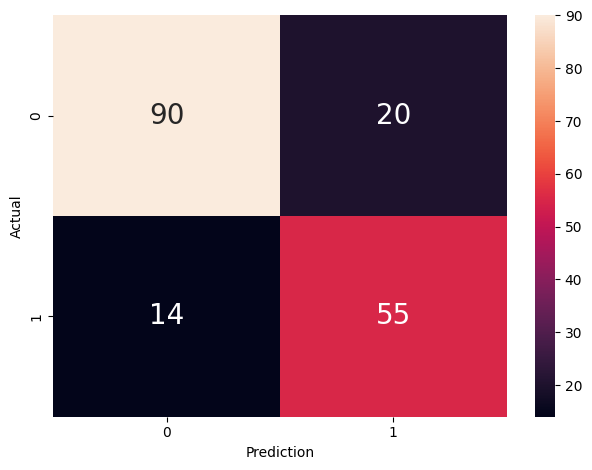

30달러 여성, 1등급 25세 :  [[1]]  => 생존


In [16]:
print("f1_score : ",f1_score(y_test,hxFn(x_test)))
sns.heatmap(
    confusion_matrix(y_test,hxFn(x_test)),
    annot=True,
    annot_kws={"size": 20},
    fmt=".0f")
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
pred=hxFn(tf.constant(test_arr_rbs, tf.float32))
print("30달러 여성, 1등급 25세 : ", pred ,' => 생존')

In [17]:
# 2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=1,
                input_dim=data.shape[-1],
                activation='sigmoid'
                ))
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1),
    metrics=['acc']
)
hist = model.fit(data_rbs,target,epochs=50)

Epoch 1/50


2022-12-03 14:42:38.089818: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-03 14:42:38.245402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 0s 6ms/step - loss: 0.6289 - acc: 0.6756
Epoch 2/50
28/28 [==============================] - 0s 5ms/step - loss: 0.4741 - acc: 0.7868
Epoch 3/50
28/28 [==============================] - 0s 5ms/step - loss: 0.4591 - acc: 0.7969
Epoch 4/50
28/28 [==============================] - 0s 5ms/step - loss: 0.4581 - acc: 0.7823
Epoch 5/50
28/28 [==============================] - 0s 5ms/step - loss: 0.4600 - acc: 0.7868
Epoch 6/50
28/28 [==============================] - 0s 5ms/step - loss: 0.4586 - acc: 0.7856
Epoch 7/50
28/28 [==============================] - 0s 5ms/step - loss: 0.4624 - acc: 0.7856
Epoch 8/50
28/28 [==============================] - 0s 5ms/step - loss: 0.4617 - acc: 0.7868
Epoch 9/50
28/28 [==============================] - 0s 5ms/step - loss: 0.4606 - acc: 0.7901
Epoch 10/50
28/28 [==============================] - 0s 5ms/step - loss: 0.4599 - acc: 0.7890
Epoch 11/50
28/28 [==============================] - 0s 5ms/step - loss: 0.4599 

f1_score :  0.7564102564102564


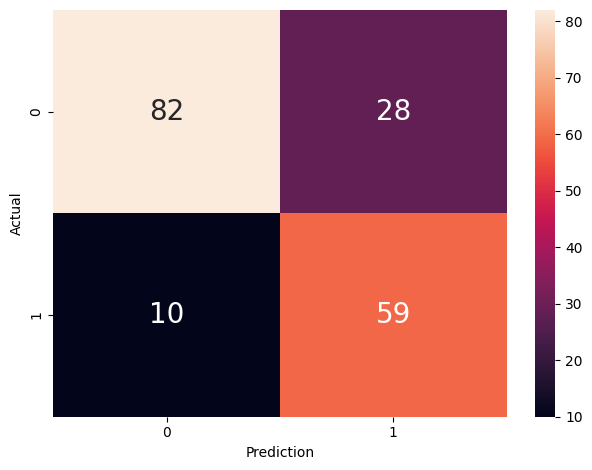

30달러 여성, 1등급 25세 :  [[1]]  => 생존


In [20]:
print("f1_score : ",f1_score(y_test,(model.predict(x_test,verbose=0)>0.5)+0))
sns.heatmap(
    confusion_matrix(y_test,(model.predict(x_test,verbose=0)>0.5)+0),
    annot=True,
    annot_kws={"size": 20},
    fmt=".0f")
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
pred=(model.predict(test_arr_rbs,verbose=0)>0.5)+0
print("30달러 여성, 1등급 25세 : ", pred ,' => 생존')

In [21]:
# 3
import torch
from torch.nn import functional as F

x = torch.FloatTensor(data_rbs)
y = torch.FloatTensor(target.values.reshape(-1,1))

w = torch.empty([x.shape[-1],1],requires_grad=True)
b = torch.empty([1],requires_grad=True)
torch.nn.init.uniform_(w)
torch.nn.init.uniform_(b)

def cost():
    z = torch.matmul(x,w) + b
    c_i = F.binary_cross_entropy_with_logits(z,y)
    c = torch.mean(c_i)
    return c

def hxFn(xdata):
    xd = torch.FloatTensor(xdata)
    z = torch.matmul(xd,w) + b
    hx = torch.sigmoid(z)
    return (hx.detach().numpy() > 0.5) + 0

optimizer = torch.optim.Adam([w,b],lr=0.1)

for i in range(1000):
    c=cost()
    optimizer.zero_grad()
    c.backward()
    optimizer.step()
    acc = accuracy_score(target,hxFn(data_rbs))
    print(f'epoch => {i} / cost => {cost().item()} acc => {acc} ')

epoch => 0 / cost => 0.7945879697799683 acc => 0.5768799102132436 
epoch => 1 / cost => 0.7639850378036499 acc => 0.6105499438832772 
epoch => 2 / cost => 0.7410154342651367 acc => 0.6262626262626263 
epoch => 3 / cost => 0.7211651802062988 acc => 0.6374859708193041 
epoch => 4 / cost => 0.7015998959541321 acc => 0.6520763187429854 
epoch => 5 / cost => 0.6816575527191162 acc => 0.6655443322109988 
epoch => 6 / cost => 0.6616837978363037 acc => 0.6689113355780022 
epoch => 7 / cost => 0.6422125697135925 acc => 0.67003367003367 
epoch => 8 / cost => 0.623671293258667 acc => 0.6745230078563412 
epoch => 9 / cost => 0.6063412427902222 acc => 0.6868686868686869 
epoch => 10 / cost => 0.5904156565666199 acc => 0.6980920314253648 
epoch => 11 / cost => 0.576023280620575 acc => 0.7059483726150393 
epoch => 12 / cost => 0.563179612159729 acc => 0.7048260381593715 
epoch => 13 / cost => 0.5517255067825317 acc => 0.7272727272727273 
epoch => 14 / cost => 0.5413457751274109 acc => 0.7463524130190

f1_score :  0.7638888888888887


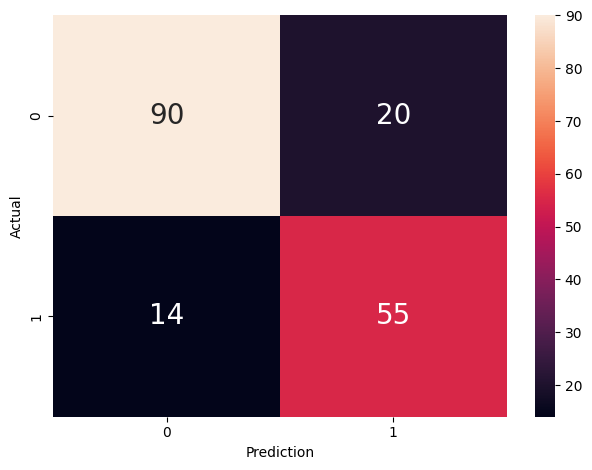

30달러 여성, 1등급 25세 :  [[1]]  => 생존
[[1]]


In [22]:
print("f1_score : ",f1_score(y_test,hxFn(x_test)))
sns.heatmap(
    confusion_matrix(y_test,hxFn(x_test)),
    annot=True,
    annot_kws={"size": 20},
    fmt=".0f")
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
pred=hxFn(test_arr_rbs)
print("30달러 여성, 1등급 25세 : ", pred ,' => 생존')

pred=hxFn(test_arr_rbs)
print(pred)

In [23]:
#4
from torch.optim import Adam
from torch.nn import BCELoss # Binary Cross Entropy


x = torch.FloatTensor(data_rbs)
y = torch.FloatTensor(target.values.reshape(-1,1))

model =torch.nn.Sequential()
model.add_module('nn1',torch.nn.Linear(x.shape[-1],1))
model.add_module('sig1',torch.nn.Sigmoid())
loss_fn = BCELoss()
optimizer = Adam( model.parameters(), lr=0.1)

for epoch in range(1000):
    optimizer.zero_grad()
    hx = model(x)
    """
    => model.forward(x)
    => z = matmul(x,w) + b : Linear
    => Sigmoid(z) : Sigmoid
    """
    c = loss_fn(hx,y)
    c.backward()
    optimizer.step()
    pred=(hx.detach().numpy() > 0.5) +0
    print(f'epoch => {epoch} / cost => {c.detach().numpy()} \
        acc => {accuracy_score(pred,y)} ')

epoch => 0 / cost => 1.0315402746200562         acc => 0.35353535353535354 
epoch => 1 / cost => 0.9366555213928223         acc => 0.36924803591470257 
epoch => 2 / cost => 0.8495231866836548         acc => 0.41975308641975306 
epoch => 3 / cost => 0.7695063352584839         acc => 0.6105499438832772 
epoch => 4 / cost => 0.7001336812973022         acc => 0.6161616161616161 
epoch => 5 / cost => 0.6472948789596558         acc => 0.6273849607182941 
epoch => 6 / cost => 0.6138777136802673         acc => 0.7205387205387206 
epoch => 7 / cost => 0.5944318771362305         acc => 0.7239057239057239 
epoch => 8 / cost => 0.582815408706665         acc => 0.7261503928170595 
epoch => 9 / cost => 0.5750837922096252         acc => 0.7317620650953984 
epoch => 10 / cost => 0.5689082145690918         acc => 0.7351290684624018 
epoch => 11 / cost => 0.5630510449409485         acc => 0.7362514029180696 
epoch => 12 / cost => 0.5569886565208435         acc => 0.7407407407407407 
epoch => 13 / cost =

f1_score :  0.7638888888888887


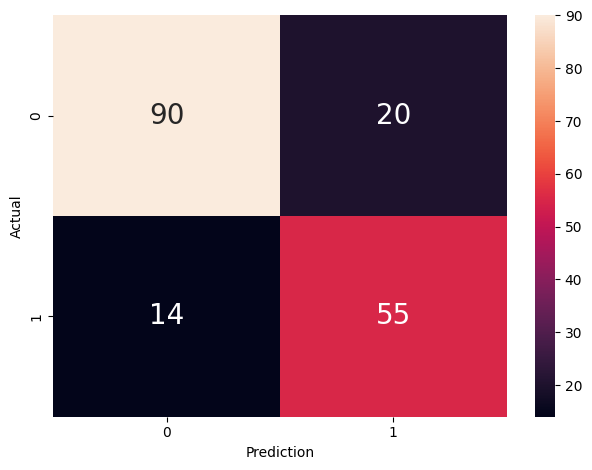

30달러 여성, 1등급 25세 :  [[1]]  => 생존


In [24]:
print("f1_score : ",f1_score(y_test,hxFn(x_test)))
sns.heatmap(
    confusion_matrix(y_test,hxFn(x_test)),
    annot=True,
    annot_kws={"size": 20},
    fmt=".0f")
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
pred=hxFn(test_arr_rbs)
print("30달러 여성, 1등급 25세 : ", pred ,' => 생존')